**Tutorial 3 - Measuring a Spectral Line by Bayesian Parameter Estimation**

In this tutorial you will measure the strength and width of a spectral line 
using a Bayesian method.


1) Read in the data from the file tut_03_data.csv.  There are three 
columns: wavelength, flux and sigma.  Sigma is the known standard deviation 
of the flux in each pixel.  Plot the spectrum using matplotlib.pyplot.errorbar().

    Unnamed: 0      flux  sigma  wavelength
0            0 -0.071036    0.1         0.0
1            1  0.078741    0.1         1.5
2            2 -0.055522    0.1         3.0
3            3  0.174301    0.1         4.5
4            4 -0.171562    0.1         6.0
..         ...       ...    ...         ...
62          62 -0.005968    0.1        93.0
63          63 -0.031031    0.1        94.5
64          64  0.254824    0.1        96.0
65          65 -0.086673    0.1        97.5
66          66  0.052072    0.1        99.0

[67 rows x 4 columns]


C:\Users\wisal\AppData\Local\Temp/ipykernel_12140/1884305198.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "co" (-> color='c'). The keyword argument will take precedence.
  plt.errorbar(wavelength, flux, yerr = sigma, elinewidth = 1.0, fmt = 'co', capsize = 1, color = 'green')


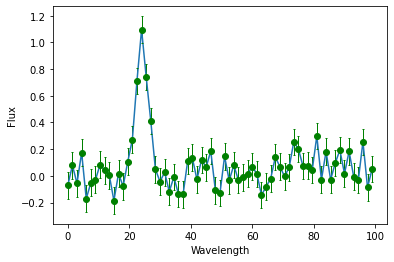

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pa

#Read the File and Print it
df = pa.read_csv(r'C:\Users\wisal\Downloads\tut_03_data.csv')
print(df)

#Convert the data into numpy arrays for easy use
flux = df['flux'].to_numpy(np.float64)
sigma = df['sigma'].to_numpy(np.float64)
wavelength = df['wavelength'].to_numpy(np.float64) 

#Plotting the wavelength vs flux arrays for the 67 data points
plt.plot(wavelength, flux)
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.errorbar(wavelength, flux, yerr = sigma, elinewidth = 1.0, fmt = 'co', capsize = 1, color = 'green')

plt.show()

2) First we need to subtract off the continuum. We know that there is a line centred around $\lambda \simeq 23$.  Take the part of the spectrum with $\lambda > 45$ which should just be background.  Assume the noise is Gaussian and uncorrelated.   Using a uniform prior on the background.

In [3]:
import scipy.optimize as opt

## Separate out the background dominated region of the spectrum, 
##  wavelength > 45,  Make vectors of the flux, wavelength and 
## sigma for these pixels.

#After the 31st data point, we have data points that have wavelength greater than 45, these data points are called background flux.
wavelength_bk = wavelength[31:]
sigma_bk = sigma[31:]
flux_bk = flux[31:]

print(df[df.wavelength>45])

    


    Unnamed: 0      flux  sigma  wavelength
31          31  0.186415    0.1        46.5
32          32 -0.108002    0.1        48.0
33          33 -0.129238    0.1        49.5
34          34  0.145973    0.1        51.0
35          35 -0.034386    0.1        52.5
36          36  0.080228    0.1        54.0
37          37 -0.031855    0.1        55.5
38          38 -0.012030    0.1        57.0
39          39  0.016637    0.1        58.5
40          40  0.068624    0.1        60.0
41          41  0.014874    0.1        61.5
42          42 -0.144351    0.1        63.0
43          43 -0.081126    0.1        64.5
44          44 -0.020288    0.1        66.0
45          45  0.140241    0.1        67.5
46          46  0.069430    0.1        69.0
47          47 -0.004577    0.1        70.5
48          48  0.063326    0.1        72.0
49          49  0.253887    0.1        73.5
50          50  0.200819    0.1        75.0
51          51  0.073606    0.1        76.5
52          52  0.075423    0.1 

In [4]:
## Make a function that takes the background level b and 
## returns the log-likelihood calculated from the data 
## in the vectors above.  The pixels are statistically independent.
## You can use the df_bk_pixels dataframe made above inside the function
## you define.


##Here we use the N-measurements formula from our book for the likelihood, all with the same sigma, and they are statistically independent so likelihood involves a sum in the exponentiation

def loglike(b):
    likelihood = (1 / (np.power((2 * np.pi), 18) * (np.power(0.1, 36)))) * np.exp(-0.5 * np.sum(np.power((flux_bk - b),2) / (0.01)))
    #converting the likelihood to log likelihood by taking log
    return np.log(likelihood)
    

    

print("the function has been defined that gives out log-likelihood")   


the function has been defined that gives out log-likelihood


check the integral: 1.0000000000000002
The integral is:  1.0000000000000002


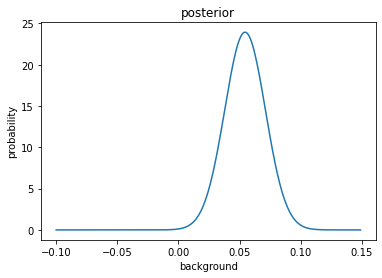

Posterior at edges of parameter space:  5.145873718776122e-18 2.52702008593454e-06
Optimization terminated successfully.
         Current function value: -27.496539
         Iterations: 16
         Function evaluations: 32
The maximum likelihood background is : [0.0545]
The average of posterior  : 0.05453108678141715
The standard deviation of the posterior  : 0.016666664987686954


In [5]:
## Make an array of possible background values.  Call 
## it "background".
## To find the right range it is sometimes useful to 
## plot the log-likelihood over different ranges until 
## you find the maximum and you are sure the likelihood 



## is zero at both edges of the range. 

#Initialize background array
bk_likely_array = []
exp_bk_likely_array = []

for j in np.arange(-0.1, 0.2, 0.001):
    loglike_bk = loglike(j)
    bk_likely_array.append(np.exp(loglike_bk))


db = 0.001 ## resolution in background
background = np.arange(-0.1,0.15,db)

## Calculate the likelihood at each of these background values
## using the function you have made.

likelihood = np.zeros(len(background))
for i,b in enumerate(background):
    likelihood[i] = np.exp(loglike(b))    ##the exp is to inverse the log to get just the likelihood

## Normalize this numerically by summing the 
## likelihood array to get the posterior distribution 
## for the background. 

#For evidence we need to integrate over b, however, this sum is a good approximation over b
normalize = np.sum(likelihood)

#Posterior is built solely from dividing by normalization upto a factor
posterior = likelihood / normalize 


factor = 1/np.sum(posterior * db)

posterior = factor * posterior
print("check the integral:", np.sum(posterior*db))

## You should look at the plot and make sure that
## the sum is a good approximation of the integral, i.e. 
## the spacing in the parameter is small enough to make the 
## curve smooth and the range is large enough.
   
## plot posterior for background normalized numerically.    
## Its integral should be 1.                                

print("The integral is: ", np.sum(posterior * db))

plt.plot(background, posterior)
plt.xlabel('background')
plt.ylabel('probability')
plt.title('posterior')
plt.show()                                                        

print('Posterior at edges of parameter space: ', posterior[0], posterior[-1])

## Find maximum of posterior and the variance numerically.     
## Use opt.fmin()
## The integrals can be made into sums.

bmax = opt.fmin(lambda x: -loglike(x), 0)                        
bave = np.sum(posterior * background)* db                   
variance = np.sum(posterior * (background-bave)**2)*db      
 
print('The maximum likelihood background is :', bmax)        
print('The average of posterior  :', bave)
print('The standard deviation of the posterior  :', np.sqrt(variance))


3) Now lets fit the line.  Assume the line has the profile

$ f(\lambda) = A \exp\left[- \left( \frac{(\lambda - \lambda_o)}{\Delta\lambda }\right)^2 \right] $

We want to find the parameters $A$, $\lambda_o$, $\Delta\lambda$ and the background.  

maximum likelihood A : 1.028667680159925
maximum likelihood lo: 24.117168521398508
maximum likelihood dl 2.6139813479828136
maximum likelihood b 0.028616502658742483


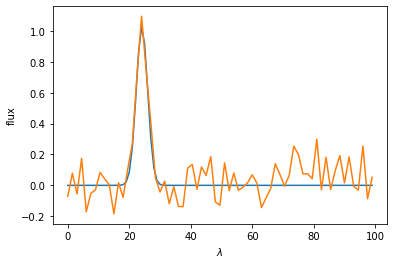

In [29]:
import sys
import scipy.optimize as opt

#We don't know the relation between flux and wavelength
#To do that, use the line (with exponential function) as a starting point

f = df['flux'].to_numpy(np.float64)
lam = df['wavelength'].to_numpy(np.float64)
s = df['sigma'].to_numpy(np.float64)

## Write a function for the line profile that takes 
## the wavelength, A, center of line, lo, and the width 
## of the line dl.

#predictive function for the flux, using the line profile
def line_profile(l,A,lo,dl):
    fluxcalc = A * np.exp(-((l - lo)/dl)**2)
    return fluxcalc

## Write a function that takes the parameters 
## A,lo,dl,b and returns the log-likelihood for 
## the data.  The function should have the signature 
## def loglike(p): where p[0]=A, p[1]=lo, p[2]=dl and p[3]=b
## You should use the original dataframe for the data with 
## the full range of wavelength.

#loglikelihood for the flux using the line profile
def loglike(p = np.array([4])): 
    if(p[2] <= 0):
        return sys.float_info.max
    loglikelihood_of_this =  0.5 * np.sum(((f - p[3] - line_profile(lam , p[0] , p[1], p[2]))/s)**2)
    return (loglikelihood_of_this)


parameters = np.array([1,25,5,0])
#final_likelihood = (loglike(parameters))


## Find the maximum likelihood values for the parameters using 
## the whole data set.  Use the library function 
## scipy.optimize.minimize() to do this. Note that what  
## this function returns is a structure with more than just the solution.
## Read the documentation for this function before starting.  You will
## need to make a guess to start the minimization.  Make these 
## guesses from the plot of the data.  

final = opt.minimize(loglike, parameters)

print('maximum likelihood A :', final.x[0])
print('maximum likelihood lo:', final.x[1])
print('maximum likelihood dl', final.x[2])
print('maximum likelihood b', final.x[3])


## 4) Plot the best fit model over the plot of the data made in 
## part 1).  Use your line_profile() function.

#x = maxlikelihood.x

x = np.arange(0,100,1)
plt.plot(x, final.x[0]*np.exp(-1 * ((x - final.x[1])/final.x[2])**2))
plt.plot(wavelength, flux)

         

plt.xlabel(r'$\lambda$')
plt.ylabel('flux')
plt.show()

5) Set all the parameters to their maximum likelihood values except the line strength $A$.  Make a plot of the **conditional posterior** for $A$ near its maximum likelihood value with uniform and Jaffreys priors on $A$.

Sum of uniform posterior 0.9999999999999999
Sum of jeffrey's posterior 0.9158152404351445


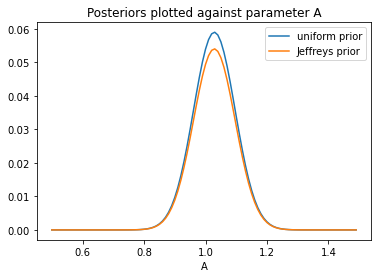

Does the choice of prior change the result significantly?
No, it does not, although Jeffrey's proior gives a slightly better result in terms of sum(integral) over its posterior
A value max for Jeffrey: [1.03]  and max likelihood value was: 1.028667680159925 so pretty close
A value max for uniform: [1.03] and max likelihood was: 1.028667680159925


In [44]:
Aarray = np.array(np.arange(0.5, 1.5, 0.01))

posterior = np.empty(len(Aarray))
for i,A in enumerate(Aarray):
         posterior[i] = np.exp(-loglike(p = [A, final.x[1], final.x[2], final.x[3]])) ## exp is to convert into likelihood from log likelihood

#Posterior with uniform prior (after normalization) - Amax drops out          
normalposterior = posterior / np.sum(posterior)
print("Sum of uniform posterior",np.sum(normalposterior))

##* np.log(np.amax(Aarray)/np.amin(Aarray))

##* np.log(np.amax(Aarray)/np.amin(Aarray))

#Jeffrey Prior
jposterior = (normalposterior) / np.log(np.amax(Aarray)/np.amin(Aarray))
print("Sum of jeffrey's posterior", np.sum(jposterior))

plt.plot(Aarray,normalposterior,label='uniform prior')
plt.plot(Aarray,jposterior,label='Jeffreys prior')
plt.title("Posteriors plotted against parameter A")
plt.legend()
plt.xlabel('A')
plt.show()

print("Does the choice of prior change the result significantly?")
print("No, it does not, although Jeffrey's proior gives a slightly better result in terms of sum(integral) over its posterior")

print("A value max for Jeffrey:", Aarray[np.where(jposterior == max(jposterior))], " and max likelihood value was:", final.x[0], "so pretty close")
print("A value max for uniform:", Aarray[np.where(normalposterior == max(normalposterior))], "and max likelihood was:", final.x[0])

6) Make a 2D map of the conditional posterior as a function of $A$ and $\Delta \lambda$ at the maximum likelihood values of the other parameters.  Do this by making a grid of $A$ and $\Delta \lambda$ values and using matplotlib.pyplot.contour().  Put the proper labels on the axes.

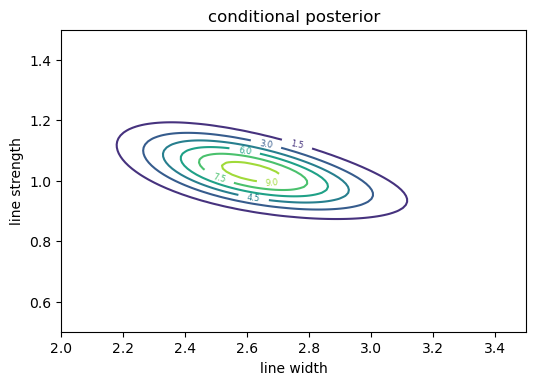

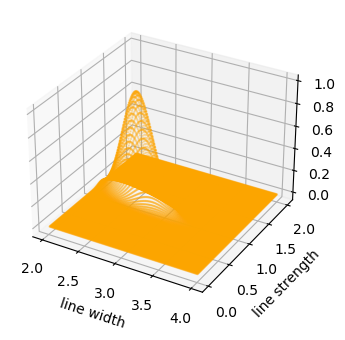

In [46]:
##

ddl = 0.1
dA = 0.1
dlarray = np.arange(2.01,4.01,0.01)
Aarray = np.arange(0.01,2.01,0.01)

post = np.zeros(shape=(len(Aarray),len(dlarray)))
for i,A in enumerate(Aarray):
    for j,dl in enumerate(dlarray):
        post[i][j] = np.exp(-loglike(p = np.array([A, final.x[1], dl, final.x[3]])))

post = post / np.sum(post) * ddl * dA
        
## this is very useful for making 2D plots. X and Y are 2D arrays.
plt.figure(dpi=100)
X, Y = np.meshgrid(dlarray, Aarray)
graph1 = plt.contour(X,Y,post)
plt.clabel(graph1, inline=True, fontsize=6)
plt.xlim(2,3.5)
plt.ylim(0.5,1.5)
plt.xlabel('line width')
plt.ylabel('line strength')
plt.title("conditional posterior")

plt.show()

plt.figure(dpi=100)
graph2=plt.axes(projection="3d",label='conditional posterior')
graph2.scatter3D(X, Y, post, s=0.5, c='orange', alpha=0.3)
plt.xlabel('line width')
plt.ylabel("line strength")
plt.show()

7) Write a function that takes values for $A$ and $\Delta \lambda$ and returns the 
posterior **marginalized** over $\lambda_o$.  Use scipy.integrate.quad() to do the 
integration.  You will need to make a new "posterior" function with the correct 
order of input parameters to use this function.  Use the maximum likelihood value for the background from part 2).  You might want to reduce the resolution of the grid to reduce the run time.

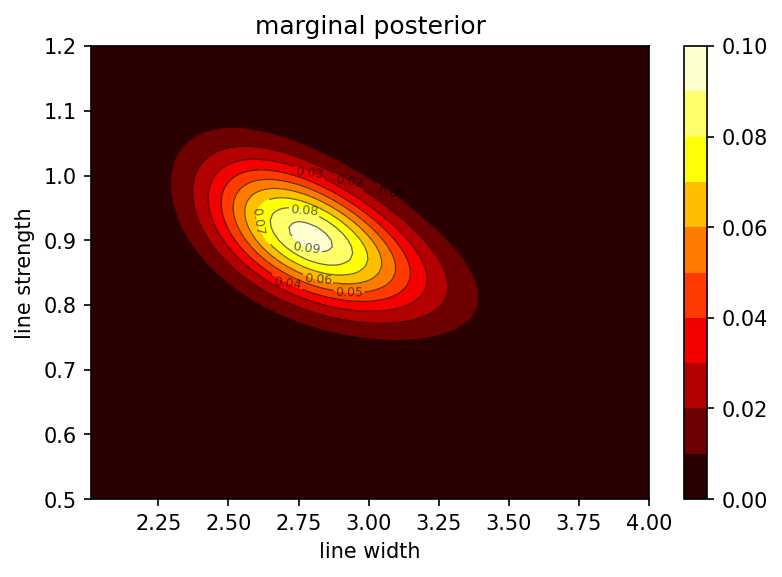

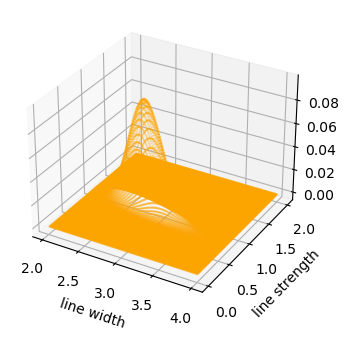

In [51]:
from scipy.integrate import quad

dlarray = np.arange(2.01,4.01,0.01)
Aarray = np.arange(0.01,2.01,0.01)
marginalizedposterior =np.zeros(shape=(len(Aarray), len(dlarray)))

back = 0.055

# this reorders the parameters
def posterior(lo,A,dl,b):
    return np.exp(-loglike(np.array([A,lo,dl,b])))
    #def loglike(A,lo,dl,b):

def marginal_posterior(A,dl,b):
    ## use quad to integrate over lo only using the arg option
    marginal_posteriorr = quad(posterior, 0, 100, args = (A, dl, b))[0]
    return marginal_posteriorr
    
for i,A in enumerate(Aarray):    
    for j,dl in enumerate(dlarray):
       marginalizedposterior[i][j] = marginal_posterior(A, dl, back)
       
#Normalization
marginalizedposterior =marginalizedposterior/(np.sum(marginalizedposterior)*ddl*dA)

plt.figure(dpi=150)
X, Y = np.meshgrid (dlarray, Aarray)
graph3 = plt.contour(X,Y,marginalizedposterior, 10, colors='black', linewidths=0.6, alpha=0.6)
plt.clabel(graph3, inline=True, fontsize=6)
graph4=plt.contourf(X,Y,marginalizedposterior, 10, cmap=plt.cm.hot)
plt.colorbar(mappable=graph4)

plt.ylim(0.5, 1.20)
plt.xlabel('line width')
plt.ylabel('line strength')
plt.title("marginal posterior")

plt.show()

plt.figure(dpi=100)
graph5=plt.axes(projection="3d",label='conditional posterior')
graph5.scatter3D(X, Y, marginalizedposterior, s=0.5, c='orange', alpha=0.3)
 
plt.xlabel('line width')
plt.ylabel("line strength")
plt.show()

8) Sum the 2D array from 7) to find the 1D marginalized posteriors for both 
$\Delta\lambda$ and $A$.  This is a numerical marginalization which can be done by simply summing along each of the axes.  The sum approximates an integral over the parameter.

Plot both marginal distributions.  If these are not smooth, you haven't used enough points in parameter space.

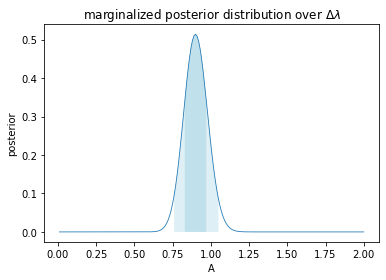

1.0
0.9999999999999999


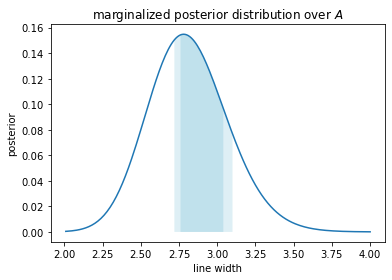

In [64]:
#####


def find_level(posterior,fraction) :
    tot = np.sum(posterior)
    max = np.max(posterior)
    min = np.min(posterior)

    ## initialize level to halfway between max and min
    level = 0.5*(max + min) 
    ## initialize fraction for this level
    frac = np.sum( posterior[ posterior >= level ]  )/tot
    ## initialize resolution = +/- smallest pixel as fraction of total
    res = np.min( posterior[ posterior >= level ]  )/tot

    ## iterate until frac is within res of the input fraction
    while( abs(frac - fraction) > res  ) :
        
        ## update max or min
        if( frac > fraction) :
            min = level
        else :
            max = level
        
        ## update level by bisecting 
        level = 0.5*(max + min)
        
        ## update frac and res    
        frac = np.sum( posterior[ posterior >= level ] )/tot
        res = np.min( posterior[ posterior >= level ]  )/tot

    ## output the level and its actual fraction
    return level,frac

###
#####
#####
Asum=np.sum(marginalizedposterior, axis=1)
dlsum=np.sum(marginalizedposterior, axis=0)

#normalization
Asum=Asum/(np.sum(Asum)*dA)
dlsum=dlsum/(np.sum(dlsum)*ddl)

A68=find_level(Asum, 0.68)[0]
dl68=find_level(dlsum, 0.68)[0]
A95=find_level(Asum, 0.95)[0]
dl95=find_level(dlsum, 0.95)[0]
p=np.array([[A68, dl68],[A95, dl95]])

Sumplot=plt.plot(Aarray, Asum, linewidth=0.8)
plt.xlabel('A')
plt.ylabel('posterior')

plt.fill_between(Aarray,Asum, 0, where=(Asum>p[0][0]), facecolor='lightblue', alpha=0.6)
plt.fill_between(Aarray,Asum, 0, where=(Asum>p[1][0]), facecolor='lightblue', alpha=0.4)

plt.title(r'marginalized posterior distribution over $\Delta\lambda$')
plt.show()

print(np.sum(Asum*dA))

dlSumplot =plt.plot(dlarray, dlsum)
plt.xlabel('line width')
plt.ylabel('posterior')

plt.fill_between(dlarray,dlsum, 0, where=(Asum>p[0][1]), facecolor='lightblue', alpha=0.6)
plt.fill_between(dlarray,dlsum, 0, where=(Asum>p[1][1]), facecolor='lightblue', alpha=0.4)

print(np.sum(dlsum*ddl))

plt.title(r'marginalized posterior distribution over $A$')
plt.show()

9) Find the mean and variance for $\Delta\lambda$ and the $A$ using the map of the marginalized posterior found above, the X and Y arrays from above, and the numpy.sum() function.  Each of these will be marginalized over all other variables except the background.  Do the integrals by simply summing in the appropriate dimensions.

In [54]:
data = np.zeros(shape = (2,2))

Asum = np.sum(marginalizedposterior, axis = 1)
dlsum = np.sum(marginalizedposterior, axis = 0)

Asum = Asum / (np.sum(Asum)* dA)
dlsum = dlsum / (np.sum(dlsum)*ddl)

MeanA = np.average(Asum)
VarianceA = np.var(Asum)

Meandl = np.average(dlsum)
Variancedl = np.var(dlsum)

data[0][0] = MeanA
data[0][1] = VarianceA
data[1][0] = Meandl
data[1][1] = Variancedl

print(data)



[[0.05       0.01566597]
 [0.05       0.00295259]]


In [55]:
#########################################
#  This function finds the level for a contour that contains 
#  a fixed fraction of the total sum of pixels (or voxels).
#  Understand it. Run this box so that it is defined
#########################################
def find_level(posterior,fraction) :
    tot = np.sum(posterior)
    max = np.max(posterior)
    min = np.min(posterior)

    ## initialize level to halfway between max and min
    level = 0.5*(max + min) 
    ## initialize fraction for this level
    frac = np.sum( posterior[ posterior >= level ]  )/tot
    ## initialize resolution = +/- smallest pixel as fraction of total
    res = np.min( posterior[ posterior >= level ]  )/tot

    ## iterate until frac is within res of the input fraction
    while( abs(frac - fraction) > res  ) :
        
        ## update max or min
        if( frac > fraction) :
            min = level
        else :
            max = level
        
        ## update level by bisecting 
        level = 0.5*(max + min)
        
        ## update frac and res    
        frac = np.sum( posterior[ posterior >= level ] )/tot
        res = np.min( posterior[ posterior >= level ]  )/tot

    ## output the level and its actual fraction
    return level,frac

###

10) Using the function above, find the 68% and 95% confidence regions for $A$ and $\Delta\lambda$ and make a 2D contour plot of these levels.

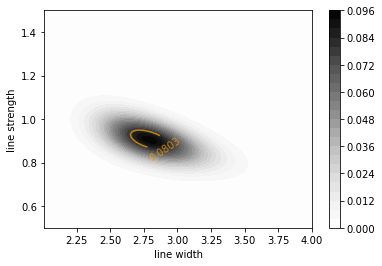

C:\Users\wisal\AppData\Local\Temp/ipykernel_12140/2932324637.py:22: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(mappable = Contor)


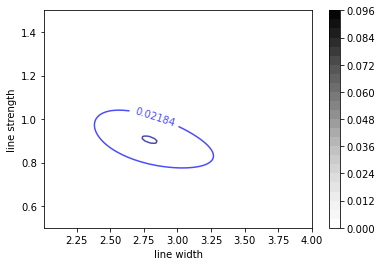

In [61]:
A68 = find_level(Asum, 0.68)[0]
dl68 = find_level(dlsum, 0.68)[0]
A95 = find_level(Asum, 0.95)[0]
dl95 = find_level(dlsum, 0.95)[0]

p = np.array([[A68, dl68],[A95, dl95]])

dlarray = np.arange(2.01, 4.01, 0.01)
Aarray = np.arange(0.01, 2.01, 0.01)
X,Y = np.meshgrid(dlarray, Aarray)
Contor = plt.contourf(X, Y, marginalizedposterior, 30, cmap = "Greys")

plott = plt.contour(X,Y, marginalizedposterior, [A95,A68], colors = ['orange', 'red'], alpha = 0.7)
plt.ylim(0.5, 1.5)
plt.xlabel('line width')
plt.ylabel('line strength')
plt.clabel(plott,)
plt.colorbar(mappable = Contor)
plt.show()

plott2 = plt.contour(X, Y, marginalizedposterior, [dl95, dl68], colors = ['blue', 'darkblue'], alpha = 0.7)
plt.colorbar(mappable = Contor)
plt.ylim(0.5, 1.5)
plt.xlabel('line width')
plt.ylabel('line strength')
plt.clabel(plott2, inline= True)

plt.show()
